# Capstone Project - FourthBrain

# Optical Coherence Tomography (Samsung OCT) Project

In [67]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from datetime import datetime
import tensorflow as tf
import glob
import cv2

In [69]:
#directories

main_dir = 'C:/Users/veich/OneDrive/Documents/Capstone_Project/OCT2017/'

train_dir = os.path.join(main_dir, 'train/')
train = os.listdir(train_dir)
val_dir = os.path.join(main_dir, 'val/')
val = os.listdir(val_dir)
test_dir = os.path.join(main_dir, 'test/')
test = os.listdir(test_dir)

In [70]:
#data set sizes

#folders = [train_dir, val_dir, test_dir]

#folder_names = {'Train': train_dir, 
#           'Val': val_dir, 
#           'Test': test_dir}

#for folder, folder_name in zip(folders, folder_names):
#    print('{} dataset: {} images'.format(folder_name, len(os.listdir(os.path.join(folder, 'CNV'))) + len(os.listdir(os.path.join(folder, 'DME'))) + 
#          len(os.listdir(os.path.join(folder, 'DRUSEN'))) + len(os.listdir(os.path.join(folder, 'NORMAL')))))

In [71]:
#labels

train_labels=os.listdir(train_dir)

print('Labels: ', train_labels)

Labels:  ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [72]:
#label distribution in train dataset

#labels =  ['CNV', 'DME', 'DRUSEN', 'NORMAL']

#for label in labels:
#  print('{}: {}'.format(label, len(os.listdir(os.path.join(train_dir, label)))))

Normal


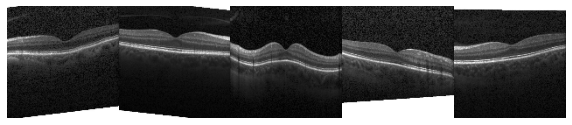

In [73]:
normalImages = glob.glob('C:/Users/veich/OneDrive/Documents/Capstone_Project/OCT2017/train/NORMAL/**')
cnvImages = glob.glob('C:/Users/veich/OneDrive/Documents/Capstone_Project/OCT2017/train/CNV/**')
dmeImages = glob.glob('C:/Users/veich/OneDrive/Documents/Capstone_Project/OCT2017/train/NORMAL/**')
drusenImages = glob.glob('C:/Users/veich/OneDrive/Documents/Capstone_Project/OCT2017/train/DRUSEN/**')

print("Normal")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in normalImages[:5]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(1, 5, i_+1) #.set_title(l)
    plt.imshow(im); plt.axis('off')
    i_ += 1

CNV


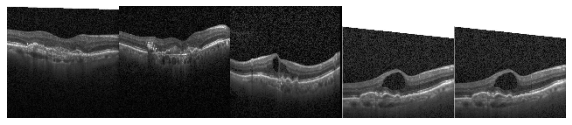

In [74]:
print("CNV")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in cnvImages[:5]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(1, 5, i_+1) #.set_title(l)
    plt.imshow(im); plt.axis('off')
    i_ += 1

DME


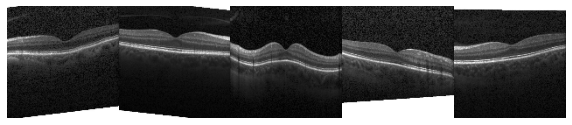

In [75]:
print("DME")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in dmeImages[:5]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(1, 5, i_+1) #.set_title(l)
    plt.imshow(im); plt.axis('off')
    i_ += 1

DRUSEN


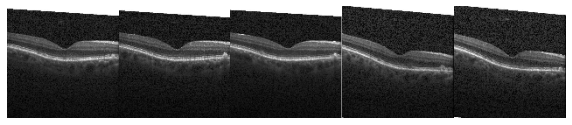

In [76]:
print("DRUSEN")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in drusenImages[:5]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(1, 5, i_+1) #.set_title(l)
    plt.imshow(im); plt.axis('off')
    i_ += 1

# Data Preprocessing

In [77]:
#ImageDataGenerator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,    
        class_mode='categorical'
        #subset='training'
        )

val_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=4,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


# Model Architecture

Inspiration: https://keras.io/guides/transfer_learning/

Instantiating the pre-trained model.

In [78]:
pretrained_model= tf.keras.applications.Xception(
    include_top=False,
    input_shape=(150,150,3),
    weights='imagenet'
    )

pretrained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_8[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

Ensuring that pre-trained model will not learn the weights again.

In [79]:
pretrained_model.trainable = False

Inputs

In [ ]:
inputs = tf.keras.Input(shape=(150, 150, 3))

New model on top

In [83]:
x = pretrained_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x - tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 4)                 1028      
                                                           

Early Stopping

In [39]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=10,
    restore_best_weights=True
)

Compiling Model

In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
Fitting Model

In [42]:
history = model.fit(train_generator, 
                           validation_data=test_generator, 
                           epochs=50,
                           steps_per_epoch=(83484/32),
                           validation_steps=(968/32),
                           max_queue_size=100,
                           workers=4,
                           #use_multiprocessing=True,
                           callbacks=[earlystop, tensorboard_callback]
                           )

Epoch 1/50
2608/2608 [==============================] - 1238s 474ms/step - loss: 0.5329 - accuracy: 0.8040 - val_loss: 0.3602 - val_accuracy: 0.8595
Epoch 2/50
2608/2608 [==============================] - 1186s 454ms/step - loss: 0.4462 - accuracy: 0.8354 - val_loss: 0.3232 - val_accuracy: 0.8636
Epoch 3/50
2608/2608 [==============================] - 1229s 471ms/step - loss: 0.4105 - accuracy: 0.8484 - val_loss: 0.3008 - val_accuracy: 0.8853
Epoch 4/50
2608/2608 [==============================] - 1246s 477ms/step - loss: 0.3791 - accuracy: 0.8597 - val_loss: 0.2664 - val_accuracy: 0.8977
Epoch 5/50
2608/2608 [==============================] - 1229s 471ms/step - loss: 0.3522 - accuracy: 0.8705 - val_loss: 0.2696 - val_accuracy: 0.8926
Epoch 6/50
2608/2608 [==============================] - 1222s 468ms/step - loss: 0.3324 - accuracy: 0.8781 - val_loss: 0.2609 - val_accuracy: 0.8988
Epoch 7/50
2608/2608 [==============================] - 1211s 464ms/step - loss: 0.3099 - accuracy: 0.8854

Model Evaluation

<AxesSubplot:title={'center':'Accuracy'}>

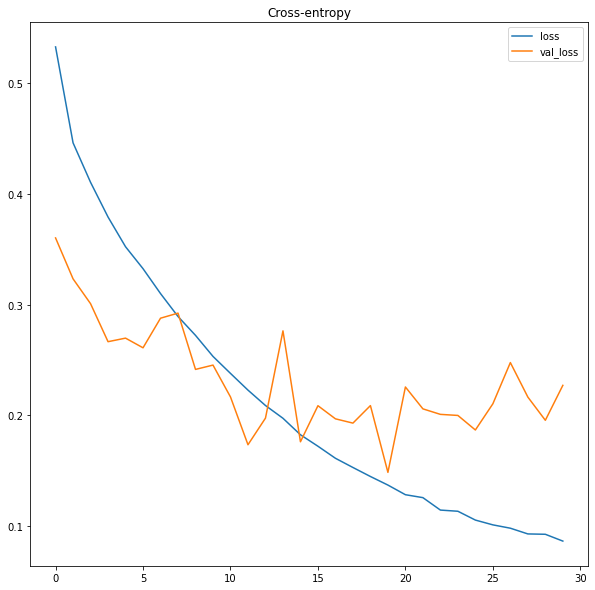

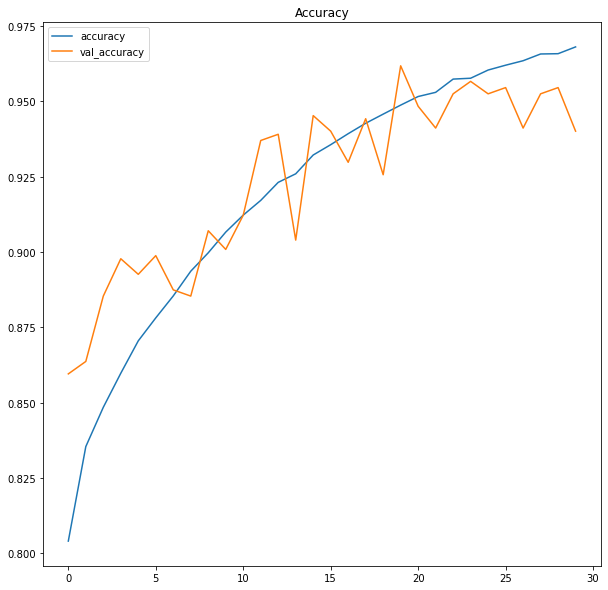

In [47]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")